Hola, Hector!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>


Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.

</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

In [2]:
#librerias
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#carga de datos
visitas = pd.read_csv('/datasets/visits_log_us.csv')
ordenes = pd.read_csv('/datasets/orders_log_us.csv')
costos = pd.read_csv('/datasets/costs_us.csv')

In [4]:
#comprension de los datos en visitas
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visitas.sample(5)

,Device,End Ts,Source Id,Start Ts,Uid
242560,desktop,2018-03-29 23:25:00,10,2018-03-29 23:24:00,8849261389684531058
115973,touch,2018-05-27 16:23:00,5,2018-05-27 16:22:00,12240701472414523874
255381,desktop,2018-04-17 20:01:00,2,2018-04-17 19:58:00,6417926052566312305
154667,touch,2017-11-26 12:10:00,4,2017-11-26 12:10:00,807454977235781038
152777,desktop,2017-07-24 21:18:00,5,2017-07-24 21:03:00,11887560930905271866


In [6]:
#comprension de los datos en ordenes
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
ordenes.sample(5)

,Buy Ts,Revenue,Uid
47013,2018-05-11 18:24:00,3.67,11857302182097116259
48246,2018-05-21 11:56:00,0.73,10574083980557684396
24987,2017-12-20 00:22:00,1.95,4629468883870018541
18339,2017-11-19 00:07:00,7.03,17484731853870228931
13306,2017-10-17 23:26:00,7.94,1097089018545265448


In [8]:
#comprension de los datos en costos
costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [9]:
costos.sample(5)

,source_id,dt,costs
579,2,2018-01-03,137.03
1040,3,2018-04-13,186.29
923,3,2017-12-15,648.71
169,1,2017-11-17,97.08
1724,5,2018-02-28,147.31


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
¡Muy bien! La carga inicial de datos y el uso de herramientas como <code>info()</code>muestran que tienes un buen control del estado de tus tablas antes de analizar. Esta base sólida facilita que el resto del flujo sea confiable. Se nota orden y criterio en la exploración preliminar, ¡excelente!
</div>

In [10]:
#formato adecuado para los titulos
visitas.columns = visitas.columns.str.replace(' ', '_').str.lower()
ordenes.columns = ordenes.columns.str.replace(' ', '_').str.lower()
costos.columns = costos.columns.str.replace(' ', '_').str.lower()

In [11]:
#cambio a formato datetime
visitas['end_ts'] = pd.to_datetime(visitas['end_ts'])
visitas['start_ts'] = pd.to_datetime(visitas['start_ts'])
ordenes['buy_ts'] = pd.to_datetime(ordenes['buy_ts'])
costos['dt'] = pd.to_datetime(costos['dt'])

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
¡Excelente progreso! Solamente te recomiendo identificar duplicados y revisas nulos; se nota una limpieza consciente para preservar la calidad de la información. Esa disciplina es clave para que los KPIs posteriores sean confiables.
</div>

In [12]:
#Pesonas por dia
dau = visitas.groupby(visitas['start_ts'].dt.date)['uid'].nunique()
print(f"DAU promedio: {dau.mean():.0f} personas")

DAU promedio: 908 personas


In [13]:
#Personas por semana
semanas = visitas['start_ts'].dt.isocalendar()
wau = visitas.groupby([semanas['year'], semanas['week']])['uid'].nunique()
print(f"WAU promedio: {wau.mean():.0f} personas")

WAU promedio: 5716 personas


In [14]:
#Personas por mes
meses = visitas['start_ts'].dt.to_period('M')
mau = visitas.groupby(meses)['uid'].nunique()
print(f"MAU promedio: {mau.mean():.0f} personas")

MAU promedio: 23228 personas


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
¡Muy bien! El cálculo de DAU/WAU/MAU con <code>groupby</code> está bien planteado y las visualizaciones permiten entender el pulso del producto. Se nota una lectura correcta de la estacionalidad y la tendencia general.
</div>

In [15]:
#sesiones diarias
sesiones = visitas.groupby(visitas['start_ts'].dt.date)['uid'].count()
print(f"sesiones promedio: {sesiones.mean():.0f} ")

sesiones promedio: 987 


In [16]:
#Duracion de las sesiones
duracion = visitas['end_ts'] - visitas['start_ts']
print(f"duracion promedio: {duracion.mean()} ")

duracion promedio: 0 days 00:10:43.025687256 


In [17]:
#frecuencia con la que regresan los usuarios
personas_mes = mau.reset_index()
retencion_usuarios = (personas_mes['uid']/mau.iloc[0])*100
retencion_usuarios

0     100.000000
1     106.968851
2      87.721548
3     143.110340
4     223.938457
5     247.356513
6     238.004374
7     216.577419
8     216.826307
9     207.202655
10    158.443322
11    156.127913
Name: uid, dtype: float64

In [18]:
#Analisis KPI
#primera venta(conversion a cliente)
first_purchase_dates = ordenes.groupby('uid')['buy_ts'].min()
first_purchase_dates.name = 'first_purchase_datetime'
ordenes_first = ordenes.join(first_purchase_dates, on='uid')

In [19]:
#primera secion del cliente
primera_visita = visitas.groupby('uid')['start_ts'].min().reset_index()

In [20]:
#tiempo de conversion a cliente
union_visita_ordenes = primera_visita.merge(ordenes_first, on='uid',how='left')
union_visita_ordenes = union_visita_ordenes.dropna()

union_visita_ordenes['duration'] = (union_visita_ordenes['first_purchase_datetime']-union_visita_ordenes['start_ts']).dt.days
union_visita_ordenes

#existen anormales que afectan el calculo del promedio por lo que opte por calcular la moda en su lugar
print(union_visita_ordenes['duration'].mean())
print()
print(union_visita_ordenes['duration'].mode())

17.419676683526728

0    0
dtype: int64


In [21]:
#categoras 0d y 1d0
OD = union_visita_ordenes[union_visita_ordenes['duration'] <= 1]
SD = union_visita_ordenes[union_visita_ordenes['duration'] > 1]

In [22]:
#Cuantos pedidos hacen durante un peridodo dado
ordenes['month'] = ordenes['buy_ts'].dt.month
ordenes_por_mes = ordenes.groupby('month')['uid'].count().reset_index()
ordenes_por_mes

,month,uid
0,1,4721
1,2,5281
2,3,5326
3,4,3273
4,5,4346
5,6,2355
6,7,2363
7,8,1807
8,9,3387
9,10,5679


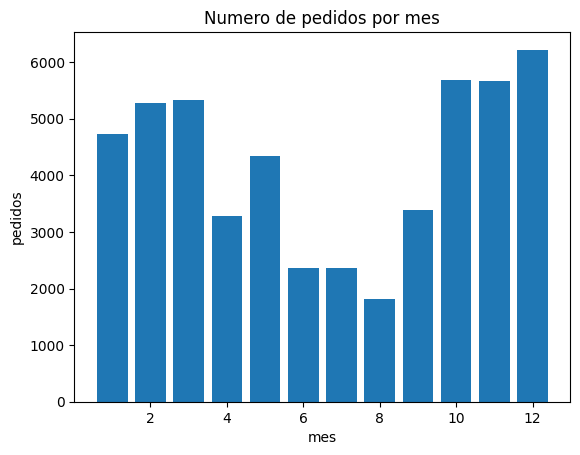

In [23]:
plt.bar(ordenes_por_mes['month'],ordenes_por_mes['uid'])
plt.title('Numero de pedidos por mes')
plt.xlabel('mes')
plt.ylabel('pedidos')
plt.show()

In [24]:
#tamaño promedio de la compra
revenue_by_ts = ordenes.groupby('buy_ts')['revenue'].sum()
print(revenue_by_ts.mean())
print()
print(revenue_by_ts.mode())

5.480576634558935

0    1.83
dtype: float64


In [25]:
#¿Cuánto dinero traen? (LTV)
revenue_by_id = ordenes.groupby('uid')['revenue'].sum()
print(revenue_by_id.mean())
print()
print(revenue_by_id.mode())

6.901327930345262

0    2.44
dtype: float64


In [26]:
#dinero gastado por fuente y fecha
costos.groupby(['source_id','dt'])['costs'].sum().reset_index()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [27]:
#Costo de adquisicion por fuente
costos_por_fuente = costos.groupby('source_id')['costs'].sum().reset_index()
costos_por_fuente

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


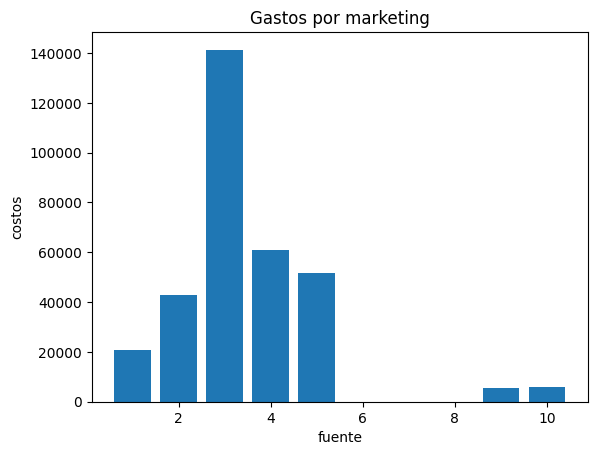

In [28]:
plt.bar(costos_por_fuente['source_id'],costos_por_fuente['costs'])
plt.title('Gastos por marketing')
plt.xlabel('fuente')
plt.ylabel('costos')
plt.show()

In [34]:
costos

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [58]:
#ROMI
#meses
ordenes['order_month']= ordenes['buy_ts'].astype('datetime64[M]')
costos['month'] = costos['dt'].astype('datetime64[M]')

In [59]:
#primer orden
primera_orden = ordenes.groupby('uid').agg({'order_month': 'min'}).reset_index()
primera_orden.columns = ['uid', 'first_order_month']

In [60]:
cohort = primera_orden.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort.columns = ['first_order_month', 'n_buyers']

In [66]:
ordenes_merge = pd.merge(ordenes,primera_orden, on='uid')

In [67]:
cohorts_f = ordenes_merge.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

In [68]:
report = pd.merge(cohort, cohorts_f, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [69]:
margin_rate = 0.5

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


In [73]:
#ltv
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.362207,0.242664,0.218819,0.477336,0.511265,0.367751,0.47522,0.290796,0.276607,0.302894,0.28563,0.128428
2017-07-01,3.005109,0.167605,0.311765,0.179488,0.088396,0.078024,0.060104,0.07091,0.080616,0.073573,0.077837,
2017-08-01,2.638259,0.235996,0.229241,0.195639,0.247026,0.14177,0.105332,0.202504,0.146106,0.093989,,
2017-09-01,2.822265,0.558793,0.260465,1.987896,0.200279,0.323534,0.350804,0.121575,0.092003,,,
2017-10-01,2.501866,0.267881,0.095697,0.078573,0.07578,0.060181,0.042408,0.057735,,,,
2017-11-01,2.577341,0.199617,0.099778,0.162476,0.074006,0.026939,0.057464,,,,,
2017-12-01,2.369095,0.130187,0.462548,0.532637,0.156465,0.169023,,,,,,
2018-01-01,2.067818,0.147379,0.152141,0.071389,0.031349,,,,,,,
2018-02-01,2.078494,0.139137,0.039258,0.037072,,,,,,,,


In [74]:
ltv_201706 = output.loc['2017-06-01'].sum()
ltv_201706

5.939616905585764

In [77]:
#cac
# obtener la cohorte necesaria
cohort_201706 = report[report['first_order_month'] == '2017-06-01']

# calcular los costos para el mes de la cohorte
costs_201706 = costos[costos['month'] == '2017-06-01']['costs'].sum()

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706   = output.loc['2017-06-01'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706)

CAC = 8.905091448344043
LTV = 5.939616905585764


In [80]:
# calcular los costos por mes
monthly_costs = costos.groupby('month').sum()
monthly_costs.head()

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


In [81]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,1020,18015.0,8.905091


In [82]:
#ROMI
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.27,0.29,0.32,0.37,0.43,0.47,0.52,0.56,0.59,0.62,0.65,0.67
2017-07-01,0.32,0.33,0.37,0.39,0.40,0.40,0.41,0.42,0.43,0.43,0.44,NaN
2017-08-01,0.24,0.27,0.29,0.31,0.33,0.34,0.35,0.37,0.38,0.39,NaN,NaN
2017-09-01,0.30,0.36,0.39,0.60,0.62,0.65,0.69,0.70,0.71,NaN,NaN,NaN
2017-10-01,0.30,0.33,0.34,0.35,0.36,0.37,0.37,0.38,NaN,NaN,NaN,NaN
2017-11-01,0.28,0.30,0.31,0.33,0.34,0.34,0.34,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.27,0.29,0.34,0.40,0.42,0.44,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.21,0.22,0.24,0.25,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.23,0.25,0.25,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
¡Muy buen trabajo! Tienes CAC por fuente/campaña, una estimación de LTV y el ROMI operativo. Se nota coherencia entre costos, ingresos y usuarios; gran base para decisiones de inversión.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Ya solamente para terminar de complementar el análisis te recomiendo una gráfica de un mapa de calor par ver el comportamiento de los usuarios. Y un análisis por dispositivo

con el estudio anterior podemos observar que aun despues de 12 meses no podmeos ver ganacia de nuestro presupuesto en mercadotecnica sin embargo podmemos observar que en la mayoria de los casos los clientes aumentan mes con mes

podemos observar que los costos de la fuente 3 con 140000 es la que nos da mas gastos con una gran diferencia por lo que en caso de cortar gastos podria ser la primera opcion

podemos observar que los meses de diciembre, noviembre y octubre son los meses mas pedidos teniendo alrededor 5500 mientras que los meses menos productivos como junio,julio y ago cuentan con alrededor de 2500 pedidos